# Análise de diversidade em cursos de TI no Brasil

## Imports e junção de bases

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../../Datasets/inep_tic/SUP_ALUNO_2009_2019_ORIGINAL_TIC.csv')
dados_curso_tic = pd.read_csv('../../Datasets/inep_tic/SUP_CURSO_2009_2019_COMPLETO_TIC.csv', sep='|', encoding='ISO-8859-1', usecols=['NU_ANO_CENSO', 'CO_IES', 'CO_CURSO', 'NO_CURSO', 'CO_UF'])
dados_ies = pd.read_csv('../../Datasets/inep/SUP_IES_2009_2019.csv', sep='|', encoding='ISO-8859-1', usecols=['NU_ANO_CENSO', 'CO_IES', 'SG_IES', 'CO_UF'])
df.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
0,2009,588,1,1,69282,NaN,NaN,3.0,1,1,...,NaN,NaN,NaN,NaN,0,0,0,NaN,0.0,2006
1,2009,1107,6,3,72070,NaN,NaN,3.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,NaN,0.0,2008
2,2009,1258,6,3,19931,NaN,NaN,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,1,NaN,1.0,2009
3,2009,161,6,2,18180,NaN,NaN,1.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,NaN,0.0,2008
4,2009,4101,6,3,80910,NaN,NaN,3.0,1,1,...,NaN,NaN,NaN,NaN,1,0,0,NaN,0.0,2007


In [3]:
print(dados_curso_tic.shape)
print(df.shape)

(24858, 5)
(5241765, 105)


In [4]:
outer_merged = pd.merge(df, dados_curso_tic, how="outer", on=['NU_ANO_CENSO', 'CO_IES', 'CO_CURSO'])
print(outer_merged.shape)

(5241766, 107)


In [5]:
outer_merged = pd.merge(outer_merged, dados_ies, how='outer', on=['NU_ANO_CENSO', 'CO_IES', 'CO_UF'])
print(outer_merged.shape)

(5257892, 108)


## Filtros

selecionando apenas os cursos de Santa Catarina

In [6]:
curso_aluno_sc = outer_merged.loc[outer_merged.CO_UF == 42]
curso_aluno_sc.shape

(164095, 108)

selecionando apenas de 2015 a 2019

In [7]:
curso_aluno_sc = curso_aluno_sc.loc[curso_aluno_sc.NU_ANO_CENSO >= 2015]
curso_aluno_sc.shape

(76942, 108)

selecionando apenas cursos presenciais

In [8]:
curso_aluno_sc.TP_MODALIDADE_ENSINO.unique()

array([ 1., nan])

In [9]:
clsc_presencial = curso_aluno_sc.loc[curso_aluno_sc.TP_MODALIDADE_ENSINO == 1]
clsc_presencial.shape

(76735, 108)

selecionando apenas os públicos

In [10]:
clsc_presencial = clsc_presencial.loc[clsc_presencial.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])]
clsc_presencial.shape

(29682, 108)

selecionando apenas os alunos cursando

In [11]:
clsc_presencial = clsc_presencial.loc[clsc_presencial['TP_SITUACAO'] == 2]

In [12]:
clsc_presencial.groupby(['NO_CURSO']).size()

NO_CURSO
ANÁLISE E DESENVOLVIMENTO DE SISTEMAS      3190
CIÊNCIA DA COMPUTAÇÃO                      7229
ENGENHARIA DE SOFTWARE                      974
GESTÃO DA TECNOLOGIA DA INFORMAÇÃO          488
REDES DE COMPUTADORES                       916
SISTEMA DE INFORMAÇÃO                      4807
SISTEMAS DE INFORMAÇÃO                      554
SISTEMAS PARA INTERNET                      439
TECNOLOGIAS DA INFORMAÇÃO E COMUNICAÇÃO    1296
dtype: int64

In [13]:
clsc_presencial.groupby(['CO_IES']).size()

CO_IES
43       4776
76       1185
585      5632
3162     2043
4756      683
5036     3811
15121    1763
dtype: int64

In [14]:
clsc_presencial.shape

(19893, 108)

In [19]:
outer_merged.to_csv('../Datasets/inep_tic/alunos_curso_2015_2019_tic_br.csv', index=False)
clsc_presencial.to_csv('../Datasets/inep_tic/alunos_curso_2015_2019_tic_sc.csv', index=False)

## Funções utilizadas

In [15]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

replace_map = {
    'TP_SITUACAO': {2: "Cursando",
                    3: "Matrícula trancada",
                    4: "Desvinculado do curso",
                    5: "Transferido para outro \n curso da mesma IES",
                    6: "Formado",
                    7: "Falecido"},
    'TP_SEXO' : {1: "Feminino", 2: "Masculino"}
}

colors = [(0.62, 0.0, 0.26), (0.89, 0.32, 0.29), (0.99, 0.65, 0.36), (1, 0.90, 0.44), (0.59, 0.73, 0.38), (0.64, 0.85, 0.64), (0.28, 0.63, 0.70), (0.37, 0.31, 0.64)]
cm = LinearSegmentedColormap.from_list('Spectral', colors)

def bar_plot_lines(dataframe, param1, param2, param3, param4, colormap=""):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)

  if colormap != "":
    # colormap = plt.cm.nipy_spectral
    # colors = [colormap(i) for i in np.linspace(0, 1, len(df[param2].unique()))]
    data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
        .plot.bar(rot=0, figsize=(25, 10), colormap=colormap, fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
  else:
    data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
        .plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
        
  plt.ylabel(param3, fontsize = 20)
  plt.xlabel(param4, fontsize = 20)

  xposition = [0.5 + i for i in range(len(df[param1].unique()))]
  for xc in xposition:
      plt.axvline(x=xc, color='gray', linestyle=':')
    
def bar_plot_lines_stacked_horizontal(dataframe, param1, param2, param3, param4, color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30), sort_params=['Feminino', 'Masculino']):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)

  data.groupby(param2)[param1].value_counts().unstack(0).sort_values(by=sort_params).plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", stacked=True, xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]).legend(prop={'size': 12})
  plt.ylabel(param3, fontsize = 16)
  plt.xlabel(param4, fontsize = 16)
  xposition = [10 + (i)*10 for i in range(tick_amout//10)]


def bar_plot_lines_horizontal(dataframe, param1, param2, param3, param4, color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30)):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)

  data.groupby(param2)[param1].value_counts().unstack(0)\
    .plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]) \
    .legend(prop={'size': 12})
  plt.ylabel(param3, fontsize = 16)
  plt.xlabel(param4, fontsize = 16)
  xposition = [10 + (i)*10 for i in range(tick_amout//10)]

## Análises

In [37]:
clsc_presencial = pd.read_csv('../../Datasets/inep_tic/alunos_curso_2015_2019_tic.csv')
clsc_presencial.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO,CO_UF,NO_CURSO,SG_IES
0,2015,585,1.0,1.0,14217.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,1.0,0.0,0.0,NaN,2007.0,42.0,CIÊNCIA DA COMPUTAÇÃO,UFSC
1,2015,585,1.0,1.0,14217.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2012.0,42.0,CIÊNCIA DA COMPUTAÇÃO,UFSC
2,2015,585,1.0,1.0,14217.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2012.0,42.0,CIÊNCIA DA COMPUTAÇÃO,UFSC
3,2015,585,1.0,1.0,14217.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2011.0,42.0,CIÊNCIA DA COMPUTAÇÃO,UFSC
4,2015,585,1.0,1.0,14217.0,NaN,4.0,1.0,1.0,1.0,...,NaN,1.0,0.0,0.0,0.0,NaN,2010.0,42.0,CIÊNCIA DA COMPUTAÇÃO,UFSC


In [38]:
df = pd.read_csv('../../Datasets/inep_tic/alunos_curso_2015_2019_tic_br.csv')
df.head()

/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_17244/2330987795.py:1: DtypeWarning: Columns (10,11,41,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Datasets/inep_tic/alunos_curso_2015_2019_tic_br.csv')


,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,...,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO,CO_UF,NO_CURSO,SG_IES
0,2009,588,1.0,1.0,69282.0,NaN,NaN,3.0,1.0,1.0,...,NaN,0.0,0.0,0.0,NaN,0.0,2006.0,41.0,CURSO SUPERIOR DE TECNOLOGIA EM DESENVOLVIMENT...,UTFPR
1,2009,588,1.0,1.0,69282.0,NaN,NaN,3.0,1.0,1.0,...,NaN,1.0,0.0,0.0,NaN,0.0,2005.0,41.0,CURSO SUPERIOR DE TECNOLOGIA EM DESENVOLVIMENT...,UTFPR
2,2009,588,1.0,1.0,69282.0,NaN,NaN,3.0,1.0,1.0,...,NaN,1.0,0.0,0.0,NaN,0.0,2005.0,41.0,CURSO SUPERIOR DE TECNOLOGIA EM DESENVOLVIMENT...,UTFPR
3,2009,588,1.0,1.0,69282.0,NaN,NaN,3.0,1.0,1.0,...,NaN,1.0,0.0,0.0,NaN,0.0,2006.0,41.0,CURSO SUPERIOR DE TECNOLOGIA EM DESENVOLVIMENT...,UTFPR
4,2009,588,1.0,1.0,69282.0,NaN,NaN,3.0,1.0,1.0,...,NaN,1.0,0.0,0.0,NaN,0.0,2006.0,41.0,CURSO SUPERIOR DE TECNOLOGIA EM DESENVOLVIMENT...,UTFPR


In [43]:
df['TP_CATEGORIA_ADMINISTRATIVA'].unique()

array([ 1.,  6.,  9.,  8.,  2.,  3.,  4.,  5.,  7., nan])

In [5]:
deficiencias = [
    'IN_DEFICIENCIA',
# 'IN_DEFICIENCIA_AUDITIVA',
# 'IN_DEFICIENCIA_FISICA',
# 'IN_DEFICIENCIA_INTELECTUAL',
# 'IN_DEFICIENCIA_MULTIPLA',
# 'IN_DEFICIENCIA_SURDEZ',
# 'IN_DEFICIENCIA_SURDOCEGUEIRA',
# 'IN_DEFICIENCIA_BAIXA_VISAO',
# 'IN_DEFICIENCIA_CEGUEIRA',
# 'IN_DEFICIENCIA_SUPERDOTACAO',
# 'IN_TGD_AUTISMO',
# 'IN_TGD_SINDROME_ASPERGER',
# 'IN_TGD_SINDROME_RETT',
# 'IN_TGD_TRANSTOR_DESINTEGRATIVO'
]

In [19]:
df['IN_DEFICIENCIA'].unique()

array([0, 1, 9])

In [189]:
df_def = df.loc[(df.IN_DEFICIENCIA == 1) &
                (df.NU_ANO_CENSO >= 2015) &
                (df.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (df.TP_MODALIDADE_ENSINO == 1)
                ]
df_no_def = df.loc[(df.IN_DEFICIENCIA == 0) &
                (df.NU_ANO_CENSO >= 2015) &
                (df.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (df.TP_MODALIDADE_ENSINO == 1)]
new_group = df_def.groupby(['NU_ANO_CENSO'])[deficiencias].value_counts()
no_def_group = df_no_def.groupby(['NU_ANO_CENSO'])[deficiencias].value_counts()

indexes = list(zip(*new_group.index))
print('valores para deficiência')
print(new_group.values*100/sum(new_group.values))

indexes_2 = list(zip(*no_def_group.index))
print('valores sem deficiência')
print(no_def_group.values*100/sum(no_def_group.values))

plot_def_brasil_def_unique = pd.DataFrame({'Anos':indexes[0], 
                         'Com deficiência':new_group.values*100/sum(new_group.values), 
                         'Sem deficiência':no_def_group.values*100/sum(no_def_group.values) })

valores para deficiência
[19.45031712 16.06765328 17.47709655 21.52924595 25.4756871 ]
valores sem deficiência
[18.23133405 18.75101535 20.42806315 20.88686801 21.70271945]


In [190]:
df_def = clsc_presencial.loc[(clsc_presencial.IN_DEFICIENCIA == 1)]
df_no_def = clsc_presencial.loc[(clsc_presencial.IN_DEFICIENCIA == 0)]
new_group = df_def.groupby(['NU_ANO_CENSO'])[deficiencias].value_counts()
no_def_group = df_no_def.groupby(['NU_ANO_CENSO'])[deficiencias].value_counts()

indexes = list(zip(*new_group.index))
print('valores para deficiência')
print(new_group.values*100/sum(new_group.values))

indexes_2 = list(zip(*no_def_group.index))
print('valores sem deficiência')
print(no_def_group.values*100/sum(no_def_group.values))

plot_def_sc_def_unique = pd.DataFrame({'Anos':indexes[0], 
                         'Com deficiência':new_group.values*100/sum(new_group.values), 
                         'Sem deficiência':no_def_group.values*100/sum(no_def_group.values) })


valores para deficiência
[12.17712177 12.91512915 21.03321033 27.30627306 26.56826568]
valores sem deficiência
[16.61363315 18.2117098  21.84627351 20.7820676  22.54631594]


<AxesSubplot: title={'center': 'Porcentagem de estudantes de IES públicas com deficiência em Santa Catarina'}, xlabel='Anos'>

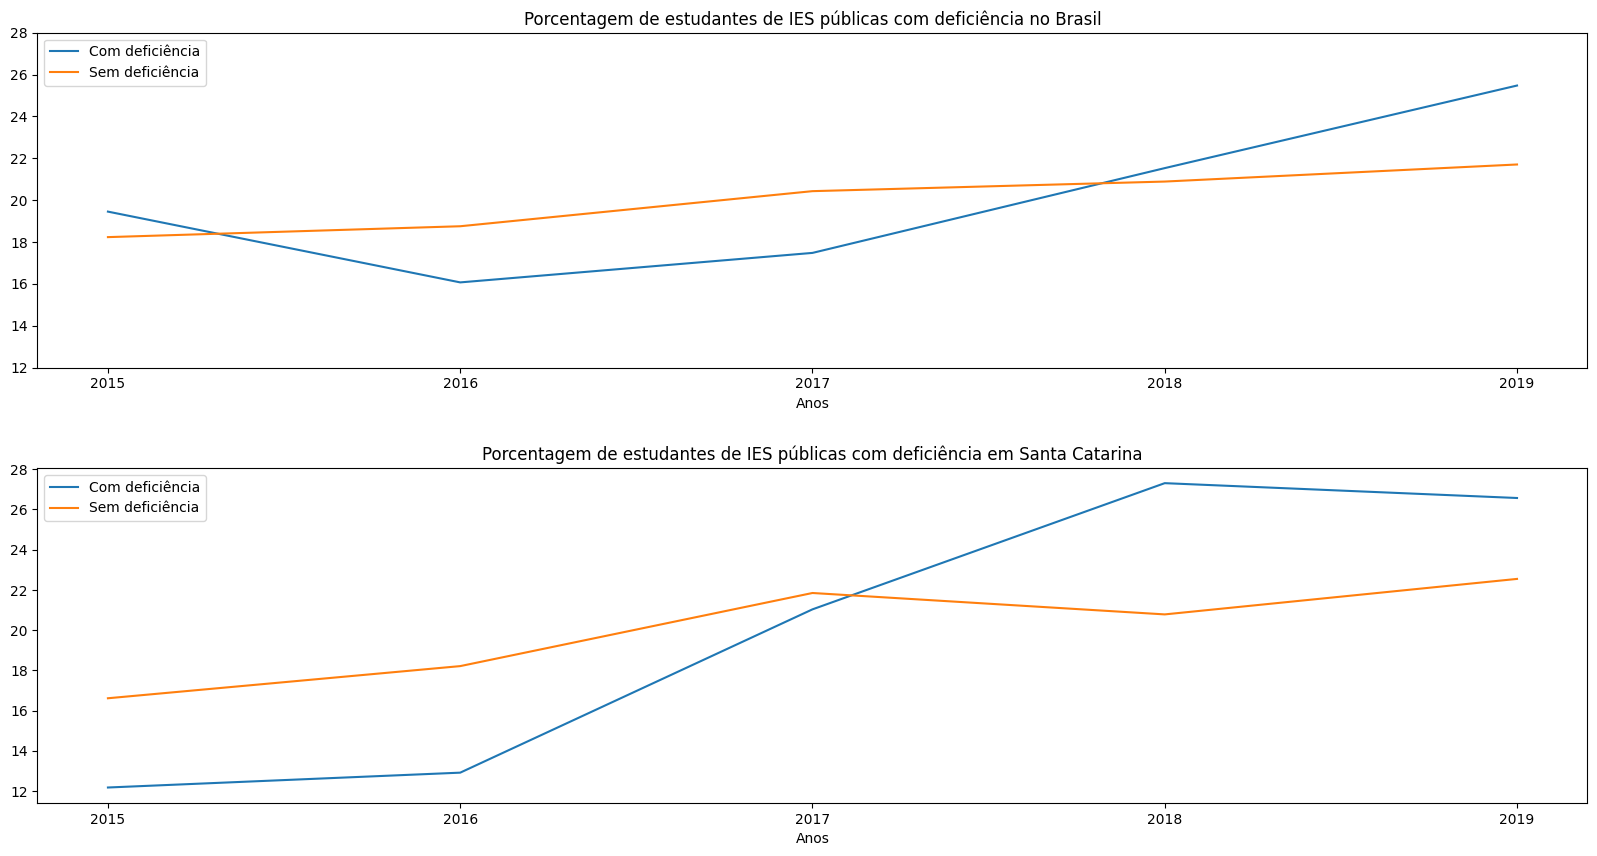

In [191]:
from matplotlib.pyplot import xticks, yticks

f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)

plot_def_brasil_def_unique.plot.line(x='Anos', xticks=[2015, 2016, 2017, 2018, 2019], yticks=[x for x in range(12, 30, 2)]
    ,title='Porcentagem de estudantes de IES públicas com deficiência no Brasil', ax=axes[0])

plot_def_sc_def_unique.plot.line(x='Anos', ax=axes[1], xticks=[2015, 2016, 2017, 2018, 2019],
    title='Porcentagem de estudantes de IES públicas com deficiência em Santa Catarina')

In [15]:
def get_vetor_deficiencias(data, deficiencia, percentage=True):
    data = data.loc[(data[deficiencia] == 1)]
    new_group = data.groupby(['NU_ANO_CENSO'])[deficiencia].value_counts()
    # indexes = list(zip(*new_group.index))
    if percentage:
        return new_group.values*100/sum(new_group.values)
    else:
        return new_group.values

def get_df_multi_column_line(data_sc:pd.DataFrame, data_br:pd.DataFrame, columns, percentage):
    df_brasil = data_br.loc[(data_br.NU_ANO_CENSO >= 2015) &
                (data_br.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (data_br.TP_MODALIDADE_ENSINO == 1)
                ]
    dict_cat_br = {}
    dict_cat_sc = {}
    for categoria in columns:
        dict_cat_br[categoria] = get_vetor_deficiencias(df_brasil, categoria, percentage)
        dict_cat_sc[categoria] = get_vetor_deficiencias(data_sc, categoria, percentage)
        
    dict_cat_br['Anos'] = [x for x in range(2015, 2020)]
    dict_cat_sc['Anos'] = [x for x in range(2015, 2020)]
    
    plot_def_br = pd.DataFrame(dict_cat_br)
    print('dados brasil')
    display(plot_def_br.head())
    plot_def_sc = pd.DataFrame(dict_cat_sc)
    print('dados sc')
    display(plot_def_sc.head())
    return plot_def_br, plot_def_sc
    

### Gráfico de deficiências - Brasil x SC

dados brasil


,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_TGD_SINDROME_ASPERGER,Anos
0,15.961538,13.860797,10.0,8.620690,2015
1,16.730769,15.169542,13.0,10.344828,2016
2,17.692308,18.262939,15.0,18.103448,2017
3,21.923077,23.438430,26.0,28.448276,2018
4,27.692308,29.268293,36.0,34.482759,2019


dados sc


,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_TGD_SINDROME_ASPERGER,Anos
0,10.344828,17.647059,11.111111,10.0,2015
1,13.793103,19.607843,13.888889,10.0,2016
2,17.241379,23.529412,19.444444,20.0,2017
3,31.034483,19.607843,27.777778,40.0,2018
4,27.586207,19.607843,27.777778,20.0,2019


<AxesSubplot: title={'center': 'Porcentagem de estudantes de IES públicas com deficiência em Santa Catarina'}, xlabel='Anos', ylabel='%'>

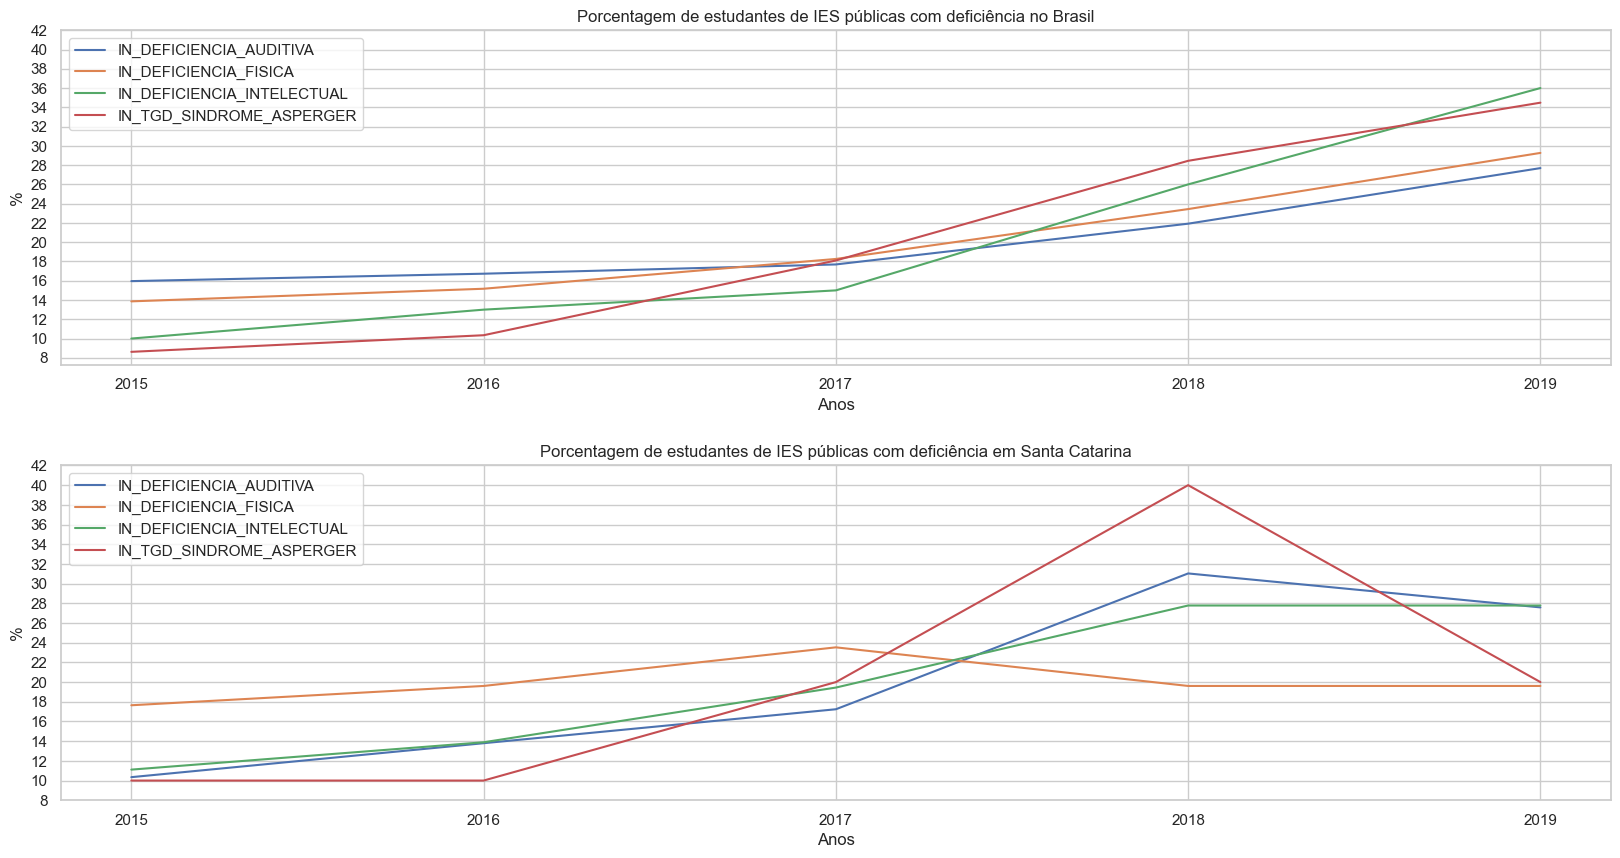

In [7]:
from matplotlib.pyplot import xticks, yticks

f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
y_ticks = [x for x in range(8, 43, 2)]
x_ticks = [2015, 2016, 2017, 2018, 2019]
deficiencias_multiplas = [
    'IN_DEFICIENCIA_AUDITIVA',
    'IN_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_INTELECTUAL',
    'IN_TGD_SINDROME_ASPERGER',
]
plot_def_brasil, plot_def_sc = get_df_multi_column_line(clsc_presencial, df, deficiencias_multiplas, True)

plot_def_brasil.plot.line(x='Anos', xticks=x_ticks, yticks=y_ticks, ylabel='%',
    title='Porcentagem de estudantes de IES públicas com deficiência no Brasil', ax=axes[0])

plot_def_sc.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, yticks=y_ticks, ylabel='%',
    title='Porcentagem de estudantes de IES públicas com deficiência em Santa Catarina')

dados brasil


,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_TGD_SINDROME_ASPERGER,Anos
0,83,233,30,10,2015
1,87,255,39,12,2016
2,92,307,45,21,2017
3,114,394,78,33,2018
4,144,492,108,40,2019


dados sc


,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_TGD_SINDROME_ASPERGER,Anos
0,3,9,4,1,2015
1,4,10,5,1,2016
2,5,12,7,2,2017
3,9,10,10,4,2018
4,8,10,10,2,2019


<AxesSubplot: title={'center': 'Porcentagem de estudantes de IES públicas com deficiência em Santa Catarina'}, xlabel='Anos'>

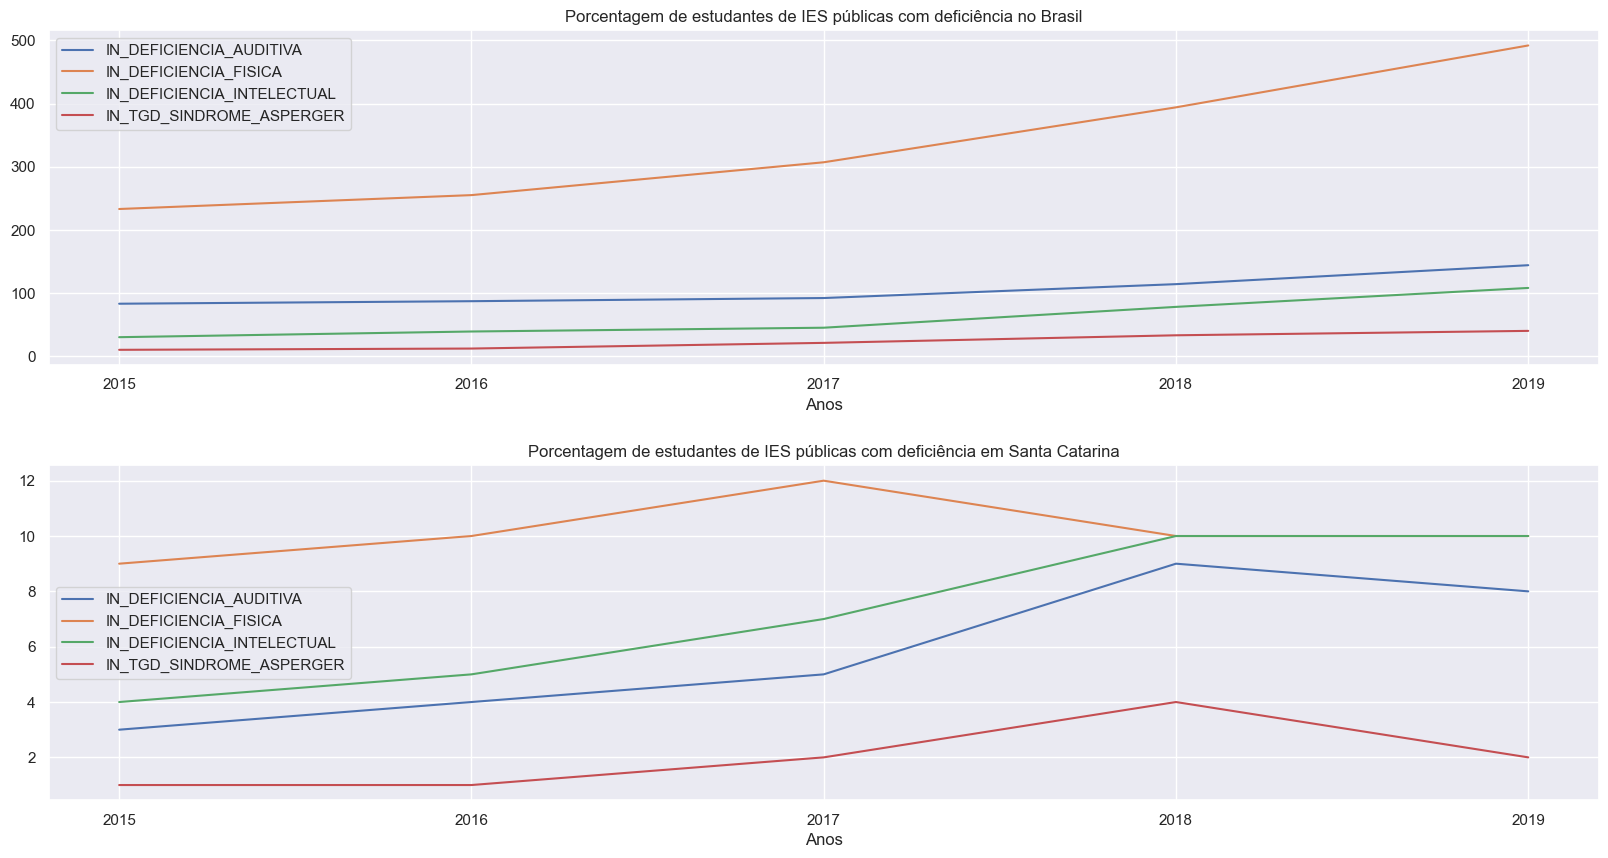

In [155]:
from matplotlib.pyplot import xticks, yticks

f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
x_ticks = [2015, 2016, 2017, 2018, 2019]
deficiencias_multiplas = [
    'IN_DEFICIENCIA_AUDITIVA',
    'IN_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_INTELECTUAL',
    'IN_TGD_SINDROME_ASPERGER',
]
plot_def_brasil, plot_def_sc = get_df_multi_column_line(clsc_presencial, df, deficiencias_multiplas, False)

plot_def_brasil.plot.line(x='Anos', xticks=x_ticks, 
    title='Porcentagem de estudantes de IES públicas com deficiência no Brasil', ax=axes[0])

plot_def_sc.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, 
    title='Porcentagem de estudantes de IES públicas com deficiência em Santa Catarina')

,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_TGD_SINDROME_ASPERGER,Anos
0,10.344828,17.647059,11.111111,10.0,2015
1,13.793103,19.607843,13.888889,10.0,2016
2,17.241379,23.529412,19.444444,20.0,2017
3,31.034483,19.607843,27.777778,40.0,2018
4,27.586207,19.607843,27.777778,20.0,2019


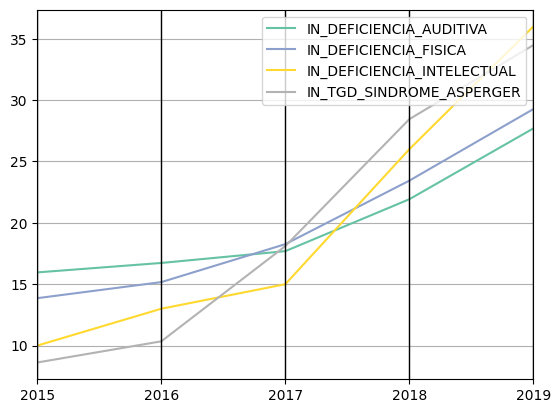

In [24]:
# libraries
import pandas
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import plotly.express as px
import numpy

display(plot_def_sc.head())
plot_def_sc.iloc[0]

dict_deficiencia = []
for deficiencia in deficiencias_multiplas:
    vetor_def = get_vetor_deficiencias(df_brasil, deficiencia).tolist()
    vetor_def.append(deficiencia)
    dict_deficiencia.append(vetor_def)
    
df_parallel_br = pd.DataFrame(dict_deficiencia, columns=['2015', '2016', '2017', '2018', '2019', 'deficiencia'])
df_parallel_br.head()

# Make the plot
parallel_coordinates(df_parallel_br, 'deficiencia', colormap=plt.get_cmap("Set2"))
plt.show()

In [25]:
replace_categoria = {
    'TP_COR_RACA':{
        0: 'Não quis declarar',  
        1: 'Branca',
        2: 'Preta',
        3: 'Parda',
        4: 'Amarela',
        5: 'Indígena',
        9: 'Sem informação'
    },
    'TP_SEXO':{
        1:'Feminino',
        2:'Masculino'
    }
}

replace_categoria_en = {
    'TP_COR_RACA':{
        0: 'Didn\'t want to declare',  
        1: 'White',
        2: 'Black',
        3: 'Brown',
        4: 'Yellow',
        5: 'Indigenous',
        9: 'No information'
    },
    'TP_SEXO':{
        1:'Feminino',
        2:'Masculino'
    }
}

In [39]:
def get_vetor_categorias_r(data, column, categoria, percentage = True):
    new_group = []
    data = data.loc[(data[column] == categoria)]
    for i in range(2015, 2020):
        x = data.loc[data.NU_ANO_CENSO == i][column].value_counts().values
        print(x, column, categoria)
        if len(x) == 0:
            new_group.append(0)
        else:
            new_group.append(x[0])
    if percentage:
        print(new_group)
        return (new_group/sum(new_group))*100
    else:
        return new_group

def get_vetor_line_chart(data_sc:pd.DataFrame, data_brasil:pd.DataFrame, column_name, values, percentage=True):
    df_brasil = data_brasil.loc[(data_brasil.NU_ANO_CENSO >= 2015) &
                (data_brasil.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                (data_brasil.TP_MODALIDADE_ENSINO == 1)
                ]
    dict_categoria_sc = {}
    dict_categoria_br = {}
    for categoria in values:
        dict_categoria_sc[categoria] = get_vetor_categorias_r(data_sc.replace(replace_categoria), column_name, categoria, percentage)
        # print(dict_categoria_sc[categoria] )
        dict_categoria_br[categoria] = get_vetor_categorias_r(df_brasil.replace(replace_categoria), column_name, categoria, percentage)
        
    dict_categoria_sc['Anos'] = [x for x in range(2015, 2020)]
    dict_categoria_br['Anos'] = [x for x in range(2015, 2020)]
    print()
    # print(dict_categoria_sc, dict_categoria_br)
    plot_def_sc_cor_raca = pd.DataFrame(dict_categoria_sc)
    plot_def_br_cor_raca = pd.DataFrame(dict_categoria_br)

    print('cor e raça em SC')
    display(plot_def_sc_cor_raca)
    print('cor e raça no brasil')
    display(plot_def_br_cor_raca)
    return plot_def_br_cor_raca, plot_def_sc_cor_raca

### Gráfico de linha cor/raça - Brasil x SC

[3957] TP_COR_RACA Branca
[4258] TP_COR_RACA Branca
[5144] TP_COR_RACA Branca
[5356] TP_COR_RACA Branca
[5490] TP_COR_RACA Branca
[3957, 4258, 5144, 5356, 5490]
[48628] TP_COR_RACA Branca
[54381] TP_COR_RACA Branca
[60432] TP_COR_RACA Branca
[63684] TP_COR_RACA Branca
[66583] TP_COR_RACA Branca
[48628, 54381, 60432, 63684, 66583]
[47] TP_COR_RACA Amarela
[45] TP_COR_RACA Amarela
[50] TP_COR_RACA Amarela
[48] TP_COR_RACA Amarela
[54] TP_COR_RACA Amarela
[47, 45, 50, 48, 54]
[2150] TP_COR_RACA Amarela
[2243] TP_COR_RACA Amarela
[2419] TP_COR_RACA Amarela
[2474] TP_COR_RACA Amarela
[2641] TP_COR_RACA Amarela
[2150, 2243, 2419, 2474, 2641]
[392] TP_COR_RACA Parda
[483] TP_COR_RACA Parda
[600] TP_COR_RACA Parda
[651] TP_COR_RACA Parda
[783] TP_COR_RACA Parda
[392, 483, 600, 651, 783]
[25657] TP_COR_RACA Parda
[30181] TP_COR_RACA Parda
[34806] TP_COR_RACA Parda
[38207] TP_COR_RACA Parda
[42884] TP_COR_RACA Parda
[25657, 30181, 34806, 38207, 42884]
[154] TP_COR_RACA Preta
[192] TP_COR_RACA Pr

,Branca,Amarela,Parda,Preta,Não quis declarar,Indígena,Anos
0,16.347862,19.262295,13.475421,13.253012,19.842829,13.483146,2015
1,17.591407,18.442623,16.603644,16.523236,23.182711,14.606742,2016
2,21.251807,20.491803,20.625645,19.535284,23.575639,16.853933,2017
3,22.127660,19.672131,22.378824,26.247849,19.744597,24.719101,2018
4,22.681264,22.131148,26.916466,24.440620,13.654224,30.337079,2019


cor e raça no brasil


,Branca,Amarela,Parda,Preta,Não quis declarar,Indígena,Anos
0,16.556580,18.026327,14.939878,15.539626,27.586346,13.424437,2015
1,18.515328,18.806070,17.574170,18.307536,22.906990,17.564309,2016
2,20.575538,20.281714,20.267272,20.957033,18.360201,22.789389,2017
3,21.682760,20.742852,22.247649,23.031380,16.173330,23.794212,2018
4,22.669794,22.143037,24.971031,22.164425,14.973132,22.427653,2019


Text(0.5, 0, 'Years')

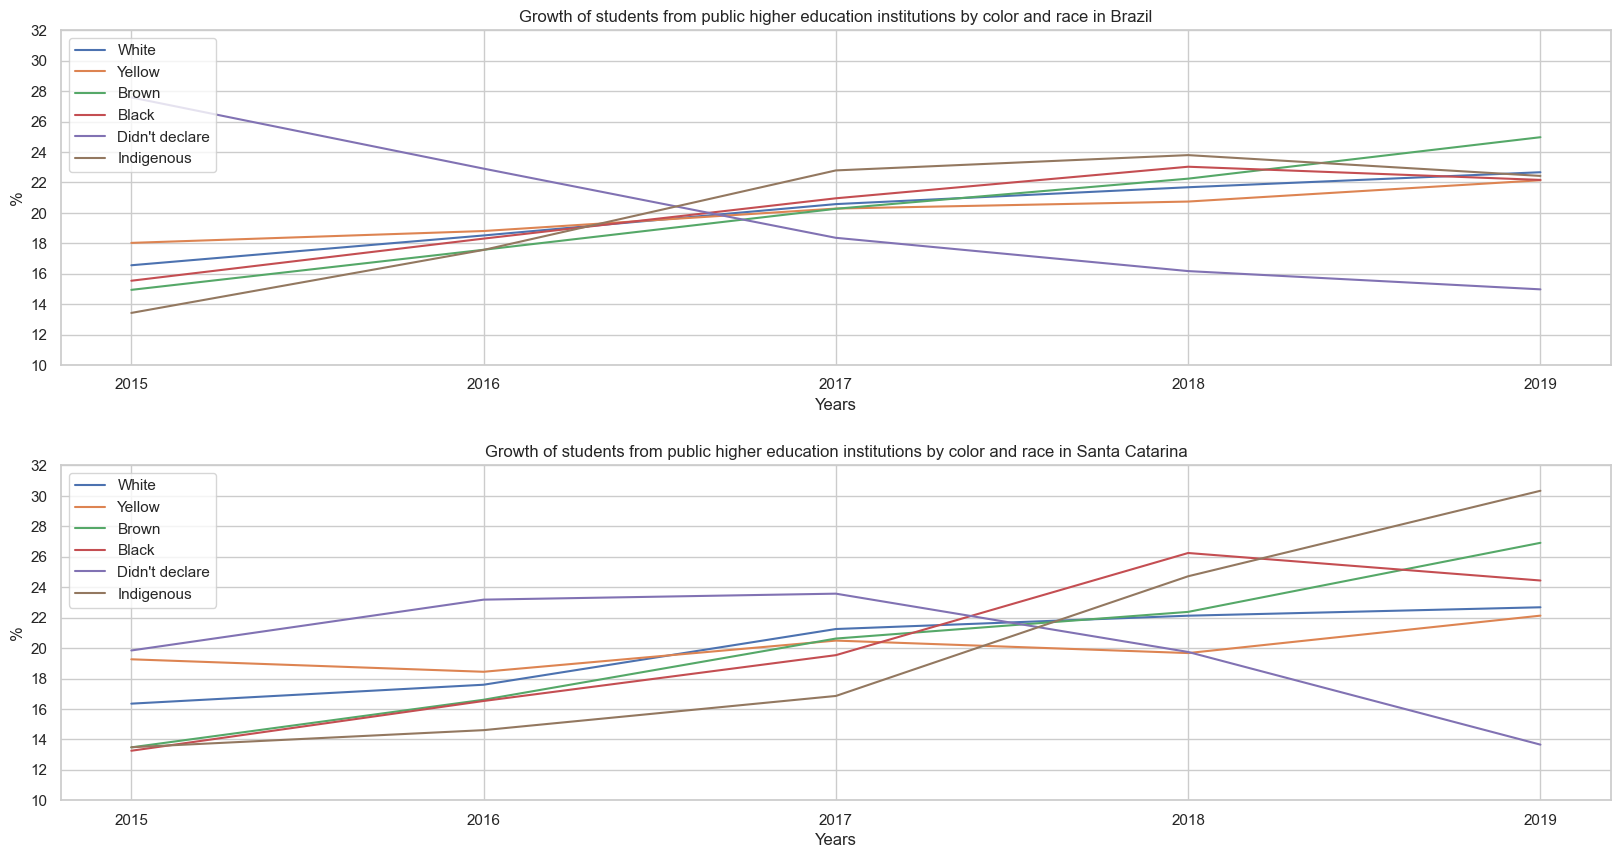

In [41]:
plot_def_br_cor_raca, plot_def_sc_cor_raca = get_vetor_line_chart(clsc_presencial, df, 'TP_COR_RACA',
            ['Branca', 'Amarela', 'Parda', 'Preta', 'Não quis declarar', 'Indígena'],True)
# plot_def_br_cor_raca, plot_def_sc_cor_raca = get_vetor_line_chart(clsc_presencial, df, 'TP_COR_RACA',
#             ['Didn\'t want to declare', 'White','Black','Brown','Yellow','Indigenous','No information'],True)
#Plots
f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
y_ticks = [x for x in range(10, 33, 2)]
x_ticks = [2015, 2016, 2017, 2018, 2019]
plot_def_br_cor_raca.plot.line(x='Anos', xticks=x_ticks, yticks=y_ticks,ylabel='%',
    # title='Crescimento de estudantes de IES públicas por cor e raça no Brasil',
    title='Growth of students from public higher education institutions by color and race in Brazil',
    ax=axes[0])
axes[0].legend(labels=['White','Yellow','Brown','Black','Didn\'t declare','Indigenous'])
axes[0].set_xlabel('Years')

plot_def_sc_cor_raca.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, yticks=y_ticks,ylabel='%',
    # title='Crescimento de estudantes de IES públicas por cor e raça em Santa Catarina'
    title='Growth of students from public higher education institutions by color and race in Santa Catarina'
    )
axes[1].legend(labels=['White','Yellow','Brown','Black','Didn\'t declare','Indigenous'])
axes[1].set_xlabel('Years')

[128] TP_COR_RACA Didn't want to declare
[151] TP_COR_RACA Didn't want to declare
[145] TP_COR_RACA Didn't want to declare
[125] TP_COR_RACA Didn't want to declare
[101] TP_COR_RACA Didn't want to declare
[27260] TP_COR_RACA Didn't want to declare
[22636] TP_COR_RACA Didn't want to declare
[18143] TP_COR_RACA Didn't want to declare
[15982] TP_COR_RACA Didn't want to declare
[14796] TP_COR_RACA Didn't want to declare
[2802] TP_COR_RACA White
[2960] TP_COR_RACA White
[3444] TP_COR_RACA White
[3538] TP_COR_RACA White
[3561] TP_COR_RACA White
[48628] TP_COR_RACA White
[54381] TP_COR_RACA White
[60432] TP_COR_RACA White
[63684] TP_COR_RACA White
[66583] TP_COR_RACA White
[113] TP_COR_RACA Black
[136] TP_COR_RACA Black
[170] TP_COR_RACA Black
[192] TP_COR_RACA Black
[184] TP_COR_RACA Black
[7349] TP_COR_RACA Black
[8658] TP_COR_RACA Black
[9911] TP_COR_RACA Black
[10892] TP_COR_RACA Black
[10482] TP_COR_RACA Black
[271] TP_COR_RACA Brown
[333] TP_COR_RACA Brown
[399] TP_COR_RACA Brown
[422] 

,Didn't want to declare,White,Black,Brown,Yellow,Indigenous,No information,Anos
0,128,2802,113,271,32,8,14,2015
1,151,2960,136,333,31,5,11,2016
2,145,3444,170,399,28,10,3,2017
3,125,3538,192,422,34,14,3,2018
4,101,3561,184,469,37,19,0,2019


cor e raça no brasil


,Didn't want to declare,White,Black,Brown,Yellow,Indigenous,No information,Anos
0,27260,48628,7349,25657,2150,334,4396,2015
1,22636,54381,8658,30181,2243,437,1992,2016
2,18143,60432,9911,34806,2419,567,1268,2017
3,15982,63684,10892,38207,2474,592,669,2018
4,14796,66583,10482,42884,2641,558,433,2019


<AxesSubplot: title={'center': 'Crescimento de estudantes de IES públicas por cor e raça em Santa Catarina'}, xlabel='Anos'>

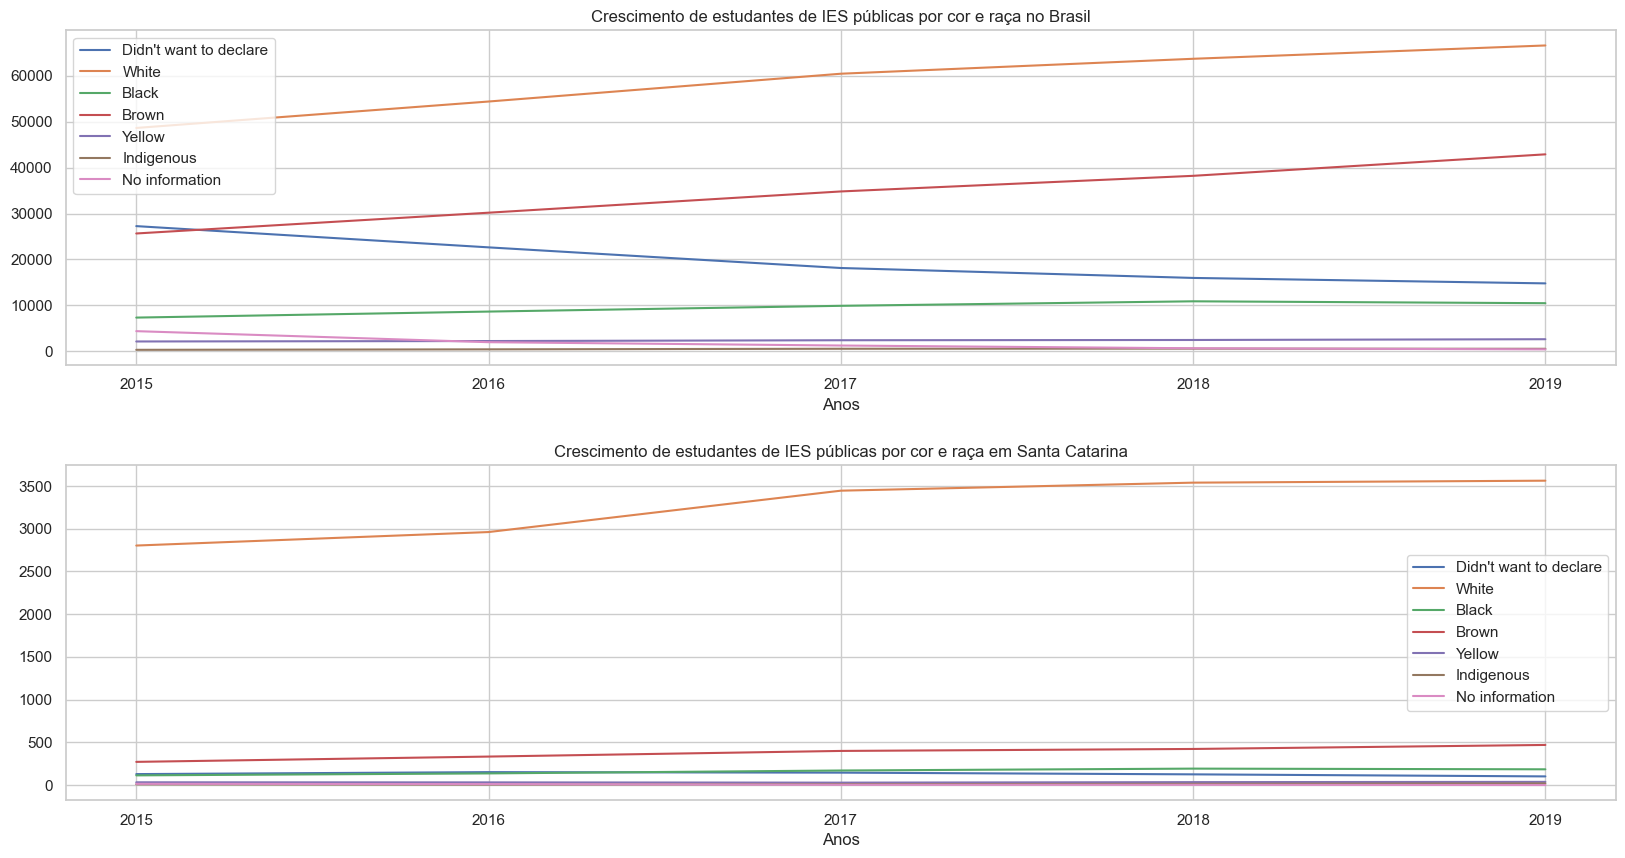

In [27]:
# plot_def_br_cor_raca, plot_def_sc_cor_raca = get_vetor_line_chart(clsc_presencial, df, 'TP_COR_RACA',
#             ['Branca', 'Amarela', 'Parda', 'Preta', 'Aluno não quis declarar', 'Indígena'],False)
plot_def_br_cor_raca, plot_def_sc_cor_raca = get_vetor_line_chart(clsc_presencial, df, 'TP_COR_RACA',
            ['Didn\'t want to declare', 'White','Black','Brown','Yellow','Indigenous','No information'],False)
#Plots
f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
# y_ticks = [x for x in range(10, 33, 2)]
x_ticks = [2015, 2016, 2017, 2018, 2019]

plot_def_br_cor_raca.plot.line(x='Anos', xticks=x_ticks,
    title='Crescimento de estudantes de IES públicas por cor e raça no Brasil', ax=axes[0])

plot_def_sc_cor_raca.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, 
    title='Crescimento de estudantes de IES públicas por cor e raça em Santa Catarina')

### Gráfico de linha sexo - Brasil x SC

In [31]:
plot_def_br, plot_def_sc = get_vetor_line_chart(clsc_presencial, df, 'TP_SEXO',
            ['Feminino', 'Masculino'],True)
#Plots
f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
y_ticks = [x for x in range(10, 33, 2)]
x_ticks = [2015, 2016, 2017, 2018, 2019]

plot_def_br.plot.line(x='Anos', xticks=x_ticks, yticks=y_ticks
    ,title='Crescimento de estudantes de IES públicas por sexo no Brasil', ax=axes[0])

plot_def_sc.plot.line(x='Anos', ax=axes[1], xticks=x_ticks, yticks=y_ticks,
    title='Crescimento de estudantes de IES públicas por sexo em Santa Catarina')

{'Feminino': array([0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.21000451, 0.22329878,
       0.1737269 , 0.18544389, 0.20752591, 0.2100

ValueError: All arrays must be of the same length

cor e raça em SC


,Feminino,Masculino,Anos
0,771,4017,2015
1,823,4419,2016
2,921,5366,2017
3,932,5656,2018
4,991,5786,2019


cor e raça no brasil


,Feminino,Masculino,Anos
0,19777,95997,2015
1,19923,100605,2016
2,20562,106984,2017
3,21098,111402,2018
4,22143,116234,2019


<AxesSubplot: title={'center': 'Crescimento de estudantes de IES públicas por sexo em Santa Catarina'}, xlabel='Anos'>

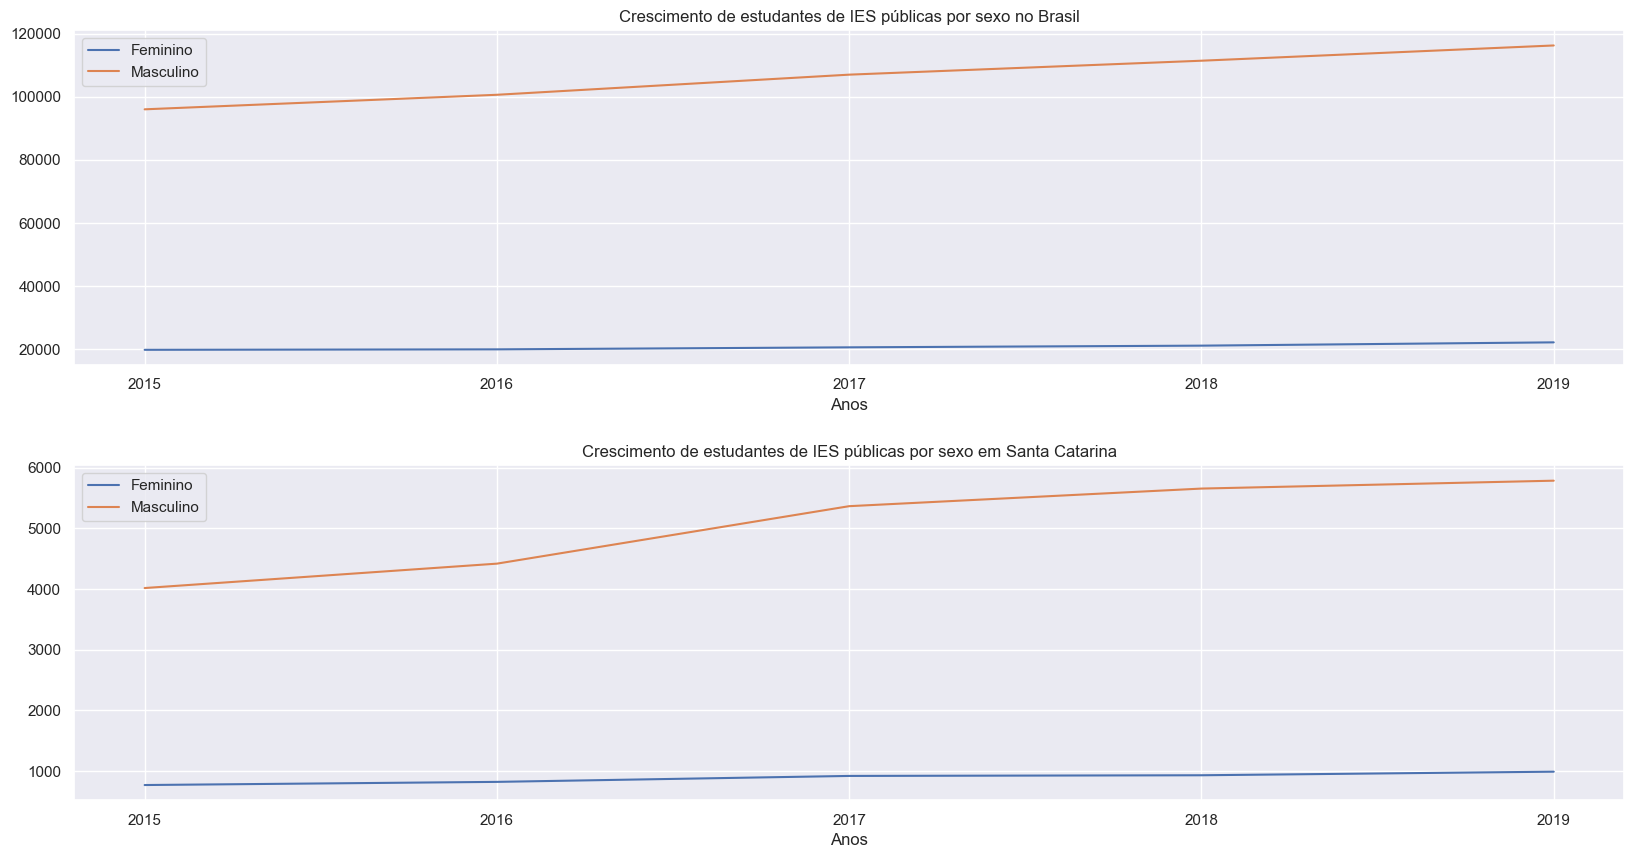

In [135]:
plot_def_br, plot_def_sc = get_vetor_line_chart(clsc_presencial, df, 'TP_SEXO',['Feminino', 'Masculino'],False)
#Plots
f, axes = plt.subplots(2, figsize=(20, 10))
f.subplots_adjust(hspace=.3, wspace=.25)
x_ticks = [2015, 2016, 2017, 2018, 2019]

plot_def_br.plot.line(x='Anos', xticks=x_ticks, 
    title='Crescimento de estudantes de IES públicas por sexo no Brasil', ax=axes[0])

plot_def_sc.plot.line(x='Anos', ax=axes[1], xticks=x_ticks,
    title='Crescimento de estudantes de IES públicas por sexo em Santa Catarina')

### Gráficos de área

In [142]:
def create_dataframe_area_chart(data, columns):
    porcentagens = []
    categoria = []
    anos = data.Anos.tolist()*len(columns)

    for x in columns:
        for y in range(len(data.values)):
            categoria.append(x)
        for y in data[x]:
            porcentagens.append(y)
        
    df = pd.DataFrame({'porcentagem': porcentagens, 'ano': anos, 'categoria': categoria})
    display(df.head())
    return df

In [78]:
porcentagens = []
sexo = []
colum = ['Feminino', 'Masculino']
anos = plot_def_sc.Anos.tolist()*len(colum)

for x in colum:
    for y in range(len(plot_def_sc.values)):
        sexo.append(x)
    for y in plot_def_sc[x]:
        porcentagens.append(y)
    
df_sc_area_chart = pd.DataFrame({'porcentagem': porcentagens, 'ano': anos, 'sexo': sexo})
df_sc_area_chart.head()

,porcentagem,ano,sexo
0,17.372690,2015,Feminino
1,18.544389,2016,Feminino
2,20.752591,2017,Feminino
3,21.000451,2018,Feminino
4,22.329878,2019,Feminino


In [143]:
import plotly.express as px

fig = px.area(create_dataframe_area_chart(plot_def_br, columns=['Feminino', 'Masculino']),
              x="ano", y="porcentagem", color="categoria", line_group="categoria",
              title='Crescimento percentual de homens e mulheres no Brasil')
fig.show()

,porcentagem,ano,categoria
0,19777,2015,Feminino
1,19923,2016,Feminino
2,20562,2017,Feminino
3,21098,2018,Feminino
4,22143,2019,Feminino


In [84]:
fig = px.area(create_dataframe_area_chart(plot_def_sc, columns=['Feminino', 'Masculino']),
              x="ano", y="porcentagem", color="categoria", line_group="categoria",
              title='Crescimento percentual de homens e mulheres no Brasil')
fig.show()

In [144]:
fig = px.area(create_dataframe_area_chart(plot_def_sc_cor_raca,
            columns=['Branca', 'Amarela', 'Parda', 'Preta', 'Aluno não quis declarar', 'Indígena']),
            x="ano", y="porcentagem", color="categoria",
            title='Crescimento percentual de homens e mulheres no Brasil')
fig.show()

,porcentagem,ano,categoria
0,16.347862,2015,Branca
1,17.591407,2016,Branca
2,21.251807,2017,Branca
3,22.127660,2018,Branca
4,22.681264,2019,Branca


In [120]:
# library
import numpy as np
import matplotlib.pyplot as plt

teste = create_dataframe_area_chart(plot_def_sc_cor_raca,columns=['Branca', 'Amarela', 'Parda', 'Preta', 'Aluno não quis declarar', 'Indígena'])
teste.head()

,porcentagem,ano,categoria
0,16.347862,2015,Branca
1,17.591407,2016,Branca
2,21.251807,2017,Branca
3,22.127660,2018,Branca
4,22.681264,2019,Branca


### Gráficos de calor - relacionando diversidades

In [211]:
def get_vetor_categorias_2(data, categoria_1, v_categorias_1, categoria_2, v_categorias_2, percentage=True):
    vetor = []
    for c1 in v_categorias_1:
        data_cat = data.loc[(data[categoria_1] == c1)]
        for c2 in v_categorias_2:
            v = data_cat.loc[(data_cat[categoria_2] == c2)].size
            vetor.append(v)
    return vetor
    
def gera_heatmap_anos(base_dados_n1, categoria_1, v_categorias_1, categoria_2, v_categorias_2, percentage=True):
    vetor = get_vetor_categorias_2(base_dados_n1, categoria_1, v_categorias_1, categoria_2, v_categorias_2, percentage=True)
    tam = len(v_categorias_2)

    x = np.array(np.tile(v_categorias_2, 2))
    y = np.array(np.repeat(v_categorias_1, tam))
    z = np.array(vetor)
    print(x, y, z)
    dfn1_n2 = pd.DataFrame.from_dict(np.array([x,y,z]).T)
    dfn1_n2.columns = ['Cor e Raça','Gênero','Evasão']
    dfn1_n2['Evasão'] = pd.to_numeric(dfn1_n2['Evasão'])
    pivotted_n1_n2= dfn1_n2.pivot('Cor e Raça','Gênero','Evasão')

    plt.figure(figsize=(16,9))
    plt.title("Taxa de Evasão Por Gênero e Cor e Raça no Ensino Superior")


    pivotted_n1_n2.index = pd.CategoricalIndex(pivotted_n1_n2.index, categories= v_categorias_2)
    pivotted_n1_n2.sort_index(level=0, inplace=True)
    sns.heatmap(pivotted_n1_n2,annot=True, linewidths=4)
    return pivotted_n1_n2

def gera_heatmap_apenas(base_dados_n1:pd.DataFrame, base_dados_n2, v_categorias_1):
    tam = len(v_categorias_1)

    x = np.array(np.tile(v_categorias_1, 2))
    y = np.array(np.repeat(v_categorias_1, tam))
    z = np.array(base_dados_n1.drop(columns=['Anos'].values))

    dfn1_n2 = pd.DataFrame.from_dict(np.array([x,y,z]).T)
    dfn1_n2.columns = ['Categoria','Gênero','Quantidade']
    dfn1_n2['Quantidade'] = pd.to_numeric(dfn1_n2['Quantidade'])
    pivotted_n1_n2= dfn1_n2.pivot('Categoria','Gênero','Quantidade')

    plt.figure(figsize=(16,9))
    plt.title("Taxa de Evasão Por Gênero e Categoria no Ensino Superior")


    pivotted_n1_n2.index = pd.CategoricalIndex(pivotted_n1_n2.index, categories= v_categorias_1)
    pivotted_n1_n2.sort_index(level=0, inplace=True)
    sns.heatmap(pivotted_n1_n2,annot=True, linewidths=4)
    return pivotted_n1_n2

/var/folders/p6/rfw63mf93d38_5ssbsg6sw_m0000gn/T/ipykernel_40417/1017801647.py:21: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



Gênero,Feminino,Masculino
Cor e Raça,,
Não quis declarar,4428,17388
Branca,67176,360180
Preta,2484,14148
Parda,7992,34344
Amarela,756,4320
Indígena,108,1188


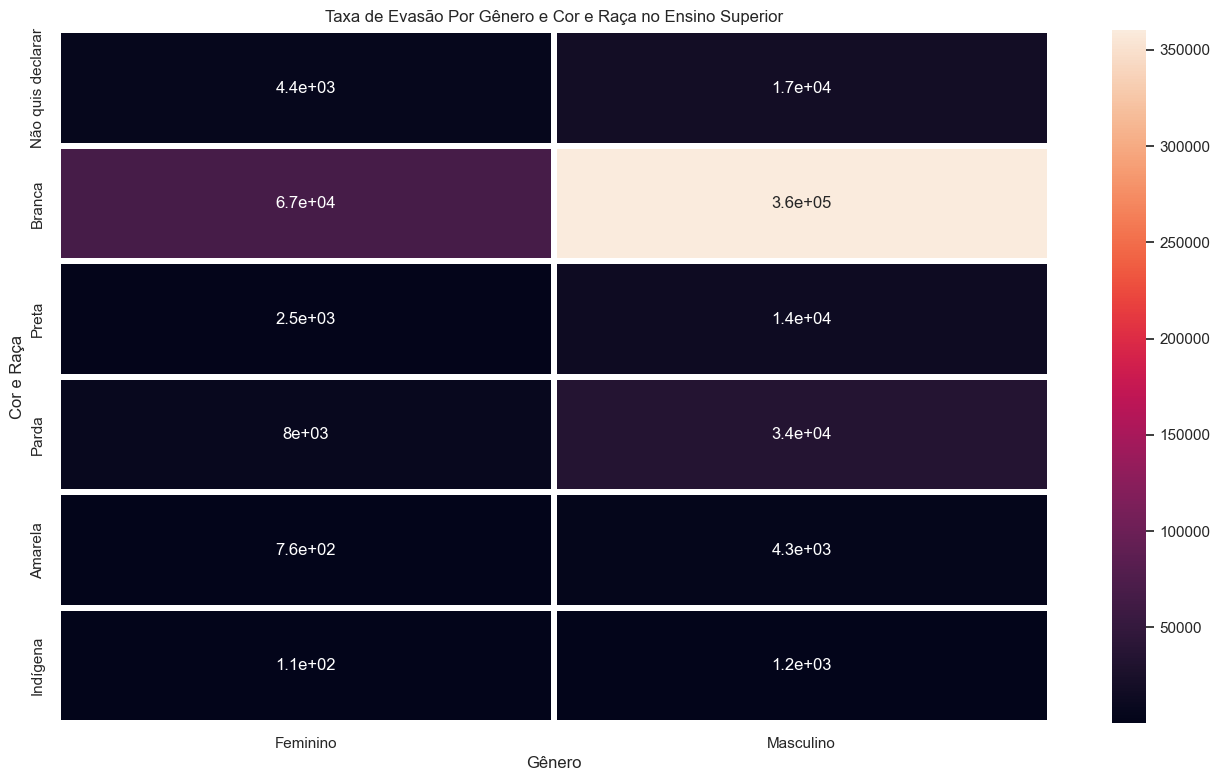

In [204]:
gera_heatmap_anos(clsc_presencial.replace(replace_categoria).loc[clsc_presencial.NU_ANO_CENSO == 2015], 'TP_SEXO', ['Feminino', 'Masculino'],
                  'TP_COR_RACA', ['Não quis declarar', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'])

In [214]:
def get_df_personalize(data_sc:pd.DataFrame, data_br:pd.DataFrame, column1, columns1, column2, columns2, percentage=True):
    df_brasil = data_br.loc[(data_br.NU_ANO_CENSO >= 2015) &
                    (data_br.TP_CATEGORIA_ADMINISTRATIVA.isin([1, 2, 3])) &
                    (data_br.TP_MODALIDADE_ENSINO == 1)
                ]
    categoria_v = []
    for categoria in columns1:
        d1_sc = data_sc.loc[data_sc[column1] == categoria]
        for cat2 in columns2:
            print(categoria, cat2)
            d2_sc = get_vetor_categorias(d1_sc, column2, cat2)
            print(d2_sc)
    
        # dict_cat_br[categoria] = get_vetor_deficiencias(df_brasil, categoria, percentage)
        # dict_cat_sc[categoria] = get_vetor_deficiencias(data_sc, categoria, percentage)
        
    # dict_cat_br['Anos'] = [x for x in range(2015, 2020)]
    # dict_cat_sc['Anos'] = [x for x in range(2015, 2020)]
    
    # plot_def_br = pd.DataFrame(dict_cat_br)
    # print('dados brasil')
    # display(plot_def_br.head())
    # plot_def_sc = pd.DataFrame(dict_cat_sc)
    # print('dados sc')
    # display(plot_def_sc.head())
    # return plot_def_br, plot_def_sc
    

deficiencias_multiplas = [
    'IN_DEFICIENCIA_AUDITIVA',
    'IN_DEFICIENCIA_FISICA',
    'IN_DEFICIENCIA_INTELECTUAL',
    'IN_TGD_SINDROME_ASPERGER',
]
get_df_personalize(clsc_presencial.replace(replace_categoria), df, 'IN_DEFICIENCIA_FISICA', [1], 'TP_SEXO', ['Feminino','Masculino'])
# get_vetor_categorias(clsc_presencial, 'IN_DEFICIENCIA_FISICA', 1, False)
# plot_def_brasil_m, plot_def_sc_m = get_df_multi_column_line(clsc_presencial.loc[clsc_presencial.TP_SEXO == 2], df, deficiencias_multiplas, False)
# plot_def_brasil_f, plot_def_sc_f = get_df_multi_column_line(clsc_presencial.loc[clsc_presencial.TP_SEXO == 1], df, deficiencias_multiplas, False)

1 Feminino
[2]
[1]
[2]
[]
[]
[0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4
 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4
 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.
 0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2
 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.
 0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4
 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4
 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.
 0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2
 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.
 0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4
 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4
 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.  0.  0.4 0.2 0.4 0.
 0.  0.4 0.2 0.4 0.  0.  0.